# MATH 10 Final project template
## Please type the names of the team members here:  JUNYI LI (11809157), Sean Long (93188739) Alimu Alibotaiken(54084203)

## Do not forget to change the filename with team member names intials replacing `starter`, separated by hyphens, in alpahbetical order by last names
For example a team with Carl Friedrich Gauss, Leonard Euler, and Henri Poincare should rename this file to `math10-finalproj-le-cg-hp.ipynb`

# Load the data from Kaggle
First download the data file in `.npz` format (native Numpy format) from [Kaggle competition website](https://www.kaggle.com/c/uci-math-10-winter2019) or directly from the [Kuzushiji repo on Kaggle](https://www.kaggle.com/anokas/kuzushiji), put them in the same folder with this notebook. The following cell will load the file as numpy arrays.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load(file):
    return np.load(file)['arr_0']

# Load the data
x_train = load('kmnist-train-imgs.npz') # the images for training
y_train = load('kmnist-train-labels.npz') # the labels (category) for images 
# the images for testing that have been randomly permuted
x_test = load('kmnist-test-imgs-perm.npz') 

# Visualize samples
Notice `x_train` and `x_test` are numpy arrays with dimensions `(60000, 28, 28)` and `(10000, 28, 28)`, so that `x_train[i,:,:]` and `x_test[i,:,:]` represent images for training and testing, respectively. We can plot first 20 samples from the `x_train`, and we make the title as their label (which category they belong) as follows: for example, in the plotted images, the first character in the first row is of category 8.

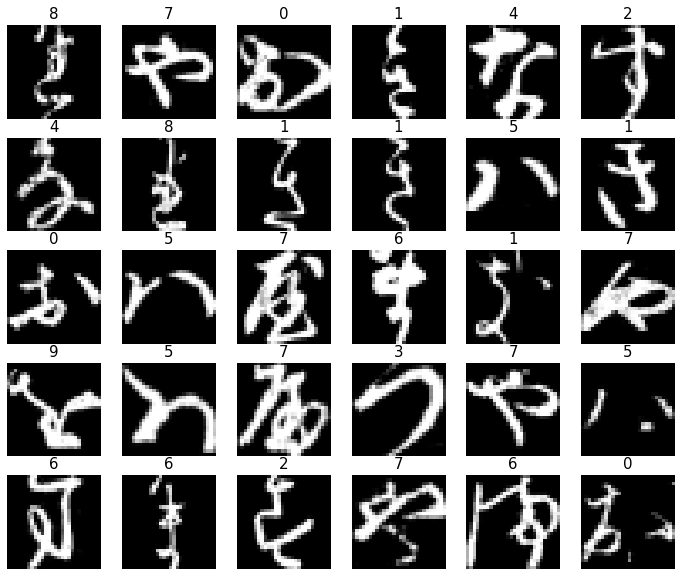

In [3]:
fig, axes = plt.subplots(5,6, figsize=(12, 10))
axes = axes.reshape(-1)

for i in range(30):
    axes[i].axis('off') # hide the axes ticks
    axes[i].imshow(x_train[i,:,:], cmap = 'gray')
    axes[i].set_title(str(y_train[i]), color= 'black', fontsize=15)
plt.show()

# Flatten the images for your model(s)
To apply the algorithms we learn in class to train an image classifier, we need first cleaning the data to flatten every 28 by 28 gray scale image to a 784 array. We rename these flattened data as capital `X_train` and `X_test`.

In [4]:
# Flatten images
X_train = np.reshape(x_train, (-1, 784))/255.0
X_test = np.reshape(x_test, (-1, 784))

In [5]:
X_train.shape # this should be (60000,784), same with MNIST


(60000, 784)

In [6]:
X_test.shape # this should be (10000,784), same with MNIST


(10000, 784)

# Choose model(s) and algorithm(s)
In Kaggle competition's leaderboard, there is a benchmark entry with about 90% accuracy using K-nearest neighbors (KNN) with `k=5`. You should choose model(s) we have learned in class, and in general, the model of your choice should exceed the benchmark's performance.

In [7]:
### your code here to use X_train and y_train ###
#K-Nearest Neigbhor 
#from sklearn.neighbors import KNeighborsClassifier
#kmnist = KNeighborsClassifier(n_neighbors=5)
#kmnist.fit(X_train,y_train)
#y_pred=kmnist.predict(X_test)

#Linear Model 
#from sklearn.linear_model import LogisticRegression
#logisticRegr = LogisticRegression(solver = 'lbfgs')
#logisticRegr.fit(X_train, y_train)
#y_pred = logisticRegr.predict(X_test)

#Neural networks
def relu(x):
    return x*(x>0)

def relu_prime(x):
    return 1.0*(x>0)

def h(X,W,b):
    # layer 1 = input layer
    a1 = X
    # layer 1 (input layer) -> layer 2 (hidden layer)
    z2 = np.matmul(X, W[0]) + b[0]
    # layer 2 activation
    a2 = relu(z2)
    # layer 2 (hidden layer) -> layer 3 (output layer)
    z3 = np.matmul(a2, W[1]) + b[1]
    # output layer activation
    output = relu(z3)
    return np.argmax(output, axis=1)  # pick the biggest activated output unit index as our prediction

eps = 1e-4

def loss(W,b,X,y):
    residual = h(X,W,b) - y
    regularization = eps*(np.sum(W[1]**2) + np.sum(W[0]**2))
    return np.mean(residual**2) + regularization
    # the second implementation is prefered due to the len(y) may not exist

def backprop(W,b,X,y):
    a1 = X
    z2 = np.matmul(X, W[0]) + b[0]
    a2 = relu(z2)
    z3 = np.matmul(a2, W[1]) + b[1]
    output = relu(z3)
    output = np.argmax(output, axis=1)
    delta3 = -(y - output).reshape(-1,1)*relu_prime(z3)
    delta2 = np.matmul(delta3, W[1].T)*relu_prime(z2)
    
    dW = [np.matmul(a1.T,delta2) + eps*W[0], np.matmul(a2.T,delta3) + eps*W[1]]
    db = [delta2, delta3]
    return dW, db

eta = 1e-6
num_steps = 50
np.random.seed(666)
W = [1e-4*np.random.randn(784, 256), 1e-4*np.random.randn(256,10)]
b = [1e-4*np.random.randn(256), 1e-4*np.random.randn(10)]

for i in range(num_steps):
    dW, db = backprop(W,b,X_train,y_train)
    W[0] = W[0] - eta * dW[0]
    W[1] = W[1] - eta * dW[1]
    b[0] = b[0] - eta * db[0]
    b[1] = b[1] - eta * db[1]


MemoryError: Unable to allocate 117. MiB for an array with shape (60000, 256) and data type float64

# Test your trained model
After your model has been trained using all or selected samples from `X_train` and `y_train`. You should obtain a solution of the prediction of the labels by your model using the testing data `X_test`, for example, scikit learn's KNN object's [`predict` function](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.predict).

### Remark:
Since you do not have access to `y_test`, to cross-validate your model, you can split the training samples to two sets, one is training dataset, the other is your cross-validation dataset (so that you have access to the `y` label of this set). This trick is usually used for Kaggle competition.

In [8]:
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten
from keras.optimizers import Adam
lr=1e-4
def load(file):
    return np.load(file)['arr_0']

# Load the data
x_train = load('kmnist-train-imgs.npz')
y_train = load('kmnist-train-labels.npz') 
x_test = load('kmnist-test-imgs-perm.npz') 
x_train = x_train.reshape(-1,28,28,1)/255.0
x_test = x_test.reshape(-1,28,28,1)/255.0
y_train = np_utils.to_categorical(y_train,num_classes=10)
model = Sequential()
# Construct the model:
model.add(Convolution2D(input_shape = (28,28,1), filters = 32,kernel_size = 5,strides = 1,padding = 'same',activation = 'relu'))
model.add(Convolution2D(64,5,strides=1,padding='same',activation = 'relu'))
model.add(MaxPooling2D(2,2,'same'))
model.add(Flatten())
model.add(Dense(1024,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
adam = Adam(lr)
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])


model.fit(x_train,y_train,batch_size=50,epochs=30)
y_predict = model.predict(x_test)

ModuleNotFoundError: No module named 'keras'

# Export your solutions and upload to Kaggle
The result predicted by your model can be named to `y_pred`, and be exported to a `.csv` file using the `np.savetxt()` function provided in the cell below. Your `y_pred` should be of a dimension `(10000,)` numpy array. Rename the resulting `solutions-yournames.csv` by replacing `yournames` by your team members' initials connected by hyphen and then upload to Kaggle.

In [9]:
solutions = np.zeros((10000, 2))
solutions[:,0] = np.arange(1,10001)
solutions[:,1] = y_pred
solutions = solutions.astype(int)
np.savetxt("solutions-JUNYI LI.csv", solutions, 
           fmt='%s', header = 'Id,Category', delimiter = ',', comments='')

NameError: name 'y_pred' is not defined

# Test the submission using a random entry
You have to make sure your submission is in the correct format, and you can use the following randomly generated solution to make sure it works. If you upload `solutions-random.csv` to Kaggle, your score should be around 10%.

In [10]:
y_random = np.random.randint(low=0, high=9, size=10000)
solutions_random = np.zeros((10000, 2))
solutions_random[:,0] = np.arange(1,10001)
solutions_random[:,1] = y_random
solutions_random = solutions_random.astype(int)
np.savetxt("solutions-random.csv", solutions_random, 
           fmt='%s', header = 'Id,Category', delimiter=',', comments='')